# MULTILAYER NN - TENSORFLOW 2.X

In [97]:
import tensorflow as tf
print(tf.__version__)
!python --version

2.12.0
Python 3.11.2


In [98]:
import keras
import tensorflow_datasets as tfds
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.python.keras import regularizers
from tensorflow.python.keras.utils import np_utils
import numpy as np

In [99]:
batch_size = 100
n_inputs = 784
n_classes = 10
n_epochs = 50

In [100]:
# Load MNIST dataset from TensorFlow Datasets

image_train, label_train = tfds.as_numpy(tfds.load(
    'mnist',
    split='train',
    batch_size=-1,
    as_supervised=True,
))

image_test, label_test = tfds.as_numpy(tfds.load(
    'mnist',
    split='test',
    batch_size=-1,
    as_supervised=True,
))

In [101]:
# Function to normalize images
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255., label

# Apply normalization to train and test datasets
image_train, label_train = normalize_img(image_train, label_train)
image_test, label_test = normalize_img(image_test, label_test)

## Creating a sequential model

In [102]:
model_sgd = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

## Model Summary:

In [103]:
model_sgd.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_28 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## Compiling the model:

In [104]:
# Compile the model
model_sgd.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model:

In [105]:
history_sgd = model_sgd.fit(image_train, label_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6045 - accuracy: 0.8419
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2903 - accuracy: 0.9169
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2389 - accuracy: 0.9317
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2053 - accuracy: 0.9415
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1809 - accuracy: 0.9489


## Evaluating the model:

In [106]:
scores = model_sgd.evaluate(image_test, label_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1690 - accuracy: 0.9498


In [107]:
print('loss:\n', scores[0])
print('accuracy:\n', scores[1])

loss:
 0.1690095216035843
accuracy:
 0.9498000144958496


## Evaluating ADAM:

In [108]:
model_adam = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [109]:
model_adam.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [110]:
history_adam = model_adam.fit(image_train, label_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2324 - accuracy: 0.9306
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1003 - accuracy: 0.9696
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0689 - accuracy: 0.9785
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0509 - accuracy: 0.9837
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0404 - accuracy: 0.9866


In [111]:
scores = model_adam.evaluate(image_test, label_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0803 - accuracy: 0.9762


In [112]:
print('loss:\n', scores[0])
print('accuracy:\n', scores[1])

loss:
 0.08027682453393936
accuracy:
 0.9761999845504761


In [113]:
import matplotlib.pyplot as plt

In [114]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

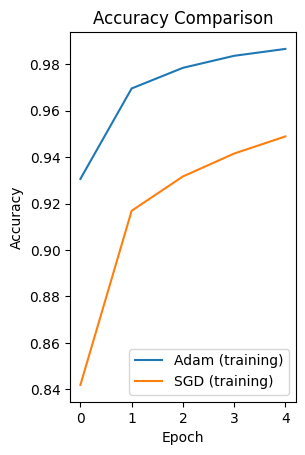

In [115]:
# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history_adam.history['accuracy'], label='Adam (training)')
# plt.plot(history_adam.history['val_accuracy'], label='Adam (validation)')
plt.plot(history_sgd.history['accuracy'], label='SGD (training)')
# plt.plot(history_sgd.history['val_accuracy'], label='SGD (validation)')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

Text(0.5, 0, 'Epoch')

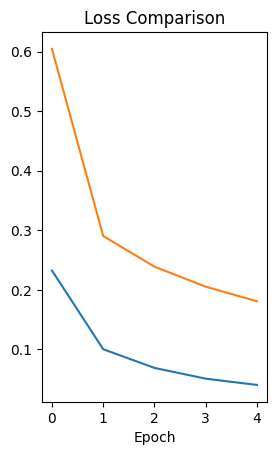

In [116]:
# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history_adam.history['loss'], label='Adam (training)')
# plt.plot(history_adam.history['val_loss'], label='Adam (validation)')
plt.plot(history_sgd.history['loss'], label='SGD (training)')
# plt.plot(history_sgd.history['val_loss'], label='SGD (validation)')
plt.title('Loss Comparison')
plt.xlabel('Epoch')